Question 1: Generate a detailed report of the data set.

In [19]:
import pandas as pd
from ydata_profiling import ProfileReport

In [20]:
# Load your CSV file into a DataFrame
file_path = 'C:/Users/jteja/Desktop/Data_mining/Homeworks/./Baltimore911.csv'  # Update this to your CSV file path
df = pd.read_csv(file_path,low_memory=False)

In [21]:
# Generate the profile report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [25]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Question 2:Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations?

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add this line at the top of your notebook
%matplotlib inline

In [28]:
# Check if the 'date' conversion worked and inspect the DataFrame
print(df.columns)  # Check columns
print(df.head())   # Inspect the first few rows

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')
    CrimeDate CrimeTime CrimeCode            Location          Description  \
0  02/08/2020   2:18:00        5D  1700 CLIFTVIEW AVE             BURGLARY   
1  02/08/2020   6:00:00        6G   700 N STREEPER ST              LARCENY   
2  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
3  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
4  02/08/2020  17:30:00        5A    1600 E OLIVER ST             BURGLARY   

  Inside/Outside   Weapon Post District     Neighborhood  Longitude  \
0              I      NaN  312  EASTERN      DARLEY PARK -76.593870   
1              I      NaN  333  EASTERN  MADISON EASTEND -76.577425   
2              I  FIREARM  314  EASTERN           OLIVE

In [29]:
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['CrimeDate'])


In [30]:
# Create new columns for year, month, and day of the week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()


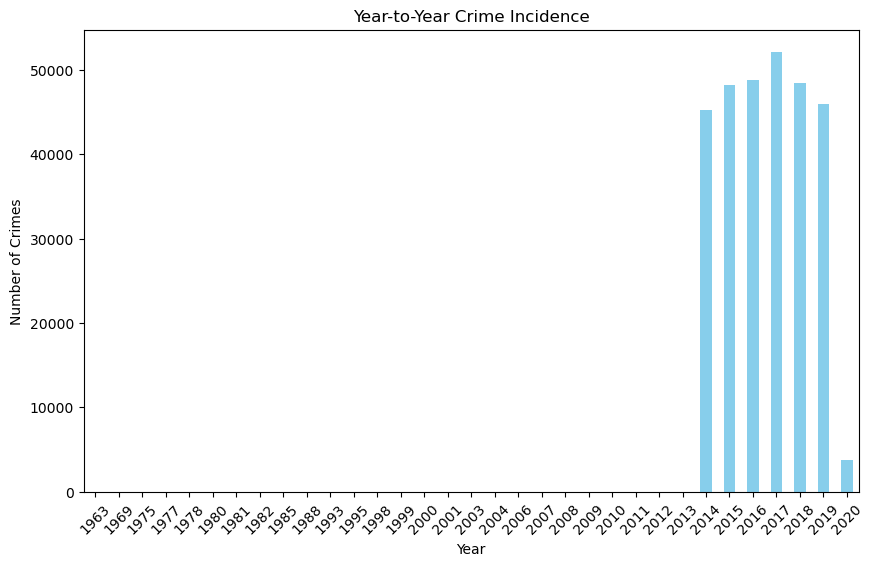

In [31]:
# Plot 1: Year-to-year crime incidence
plt.figure(figsize=(10, 6))
yearly_counts = df.groupby('year').size()
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Year-to-Year Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

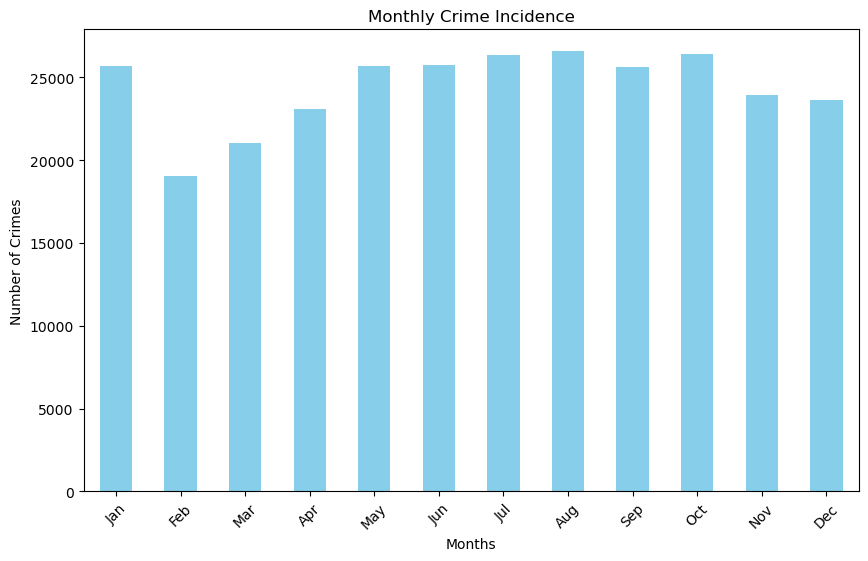

In [32]:
# Plot 2: Monthly crime incidence (aggregated over all years)
plt.figure(figsize=(10, 6))
monthly_counts = df.groupby('month').size()
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Monthly Crime Incidence')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


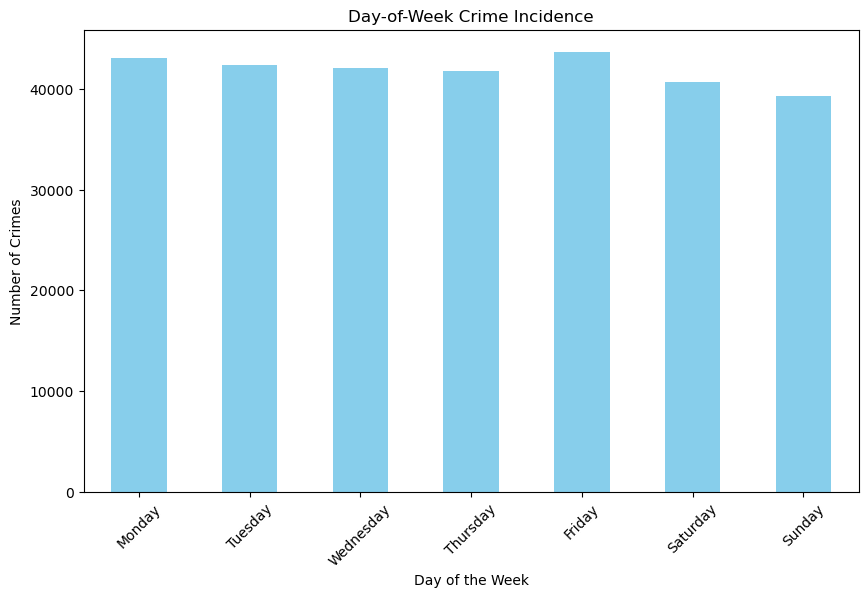

In [40]:
# Plot 3: Day-of-week crime incidence
plt.figure(figsize=(10, 6))
day_of_week_counts = df.groupby('day_of_week').size()
day_of_week_counts = day_of_week_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Day-of-Week Crime Incidence')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


Question 3: Generate a plot describing the distribution of crime type aggregating from all geo-locations and all periods?

In [43]:
# Count the occurrences of each crime type based on the Description column
crime_counts = df['Description'].value_counts()

In [45]:

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

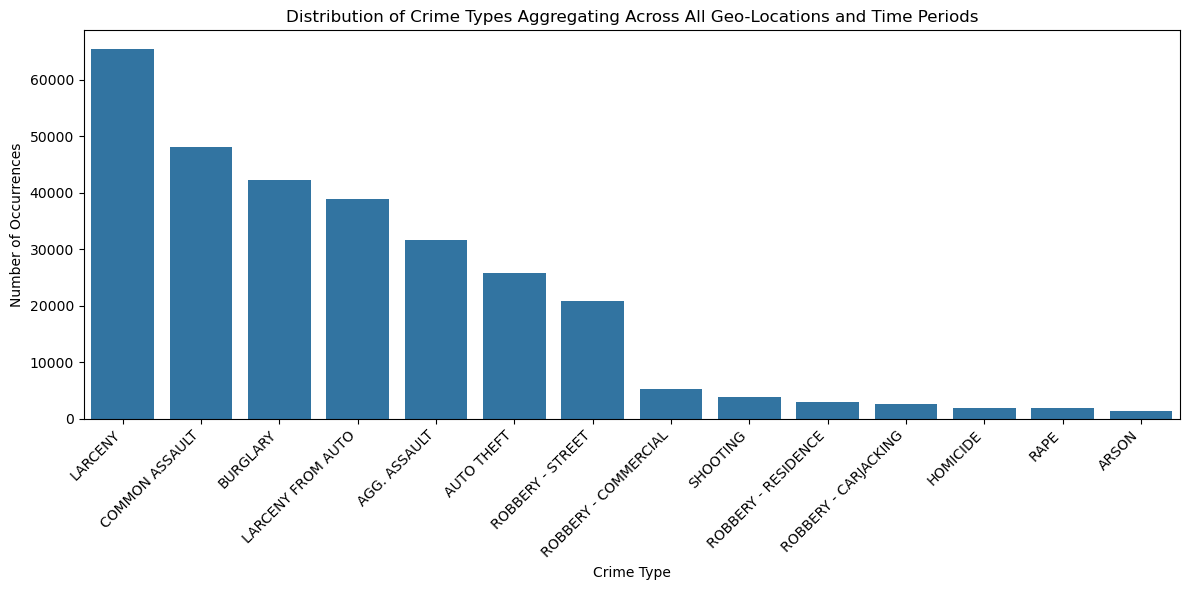

In [47]:


# Plot the distribution of crime types
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.index, y=crime_counts.values)
plt.title('Distribution of Crime Types Aggregating Across All Geo-Locations and Time Periods')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Question 4 :Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations

In [50]:
# Convert 'date' column to datetime if it's not already in that format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])



In [52]:
# Create new columns for year, month, and day of the week
df['year'] = df['CrimeDate'].dt.year
df['month'] = df['CrimeDate'].dt.month_name()  # Month names instead of numbers
df['day_of_week'] = df['CrimeDate'].dt.day_name()  # Day names

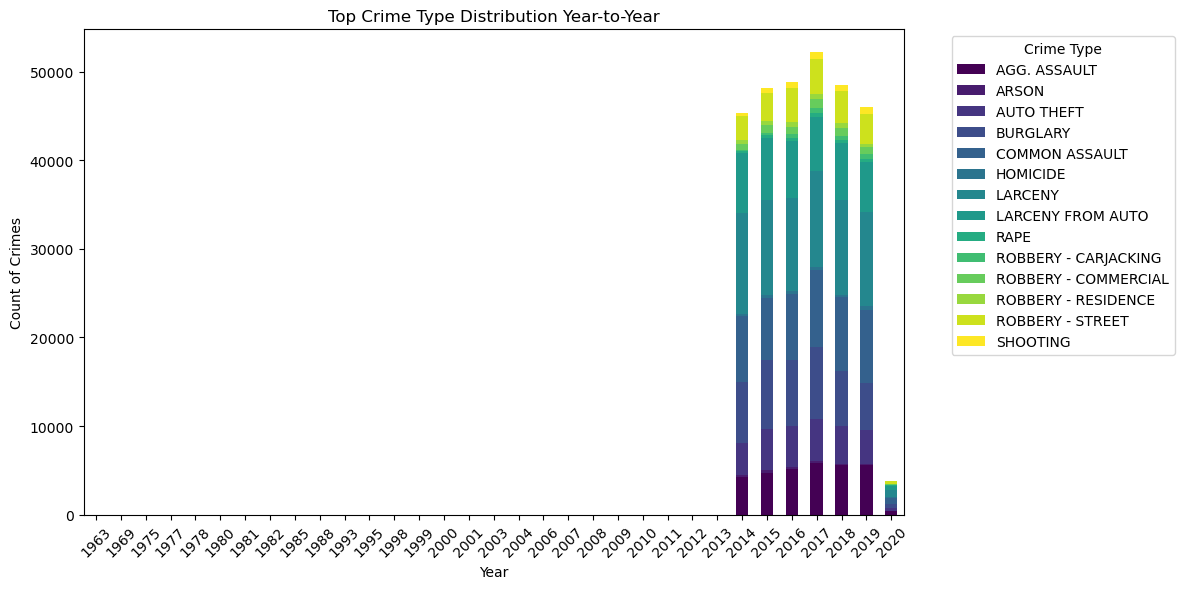

In [56]:
### Plot 1: Year-to-Year Crime Type Distribution
plt.figure(figsize=(12, 6))
crime_type_yearly = df.groupby(['year', 'Description']).size().unstack(fill_value=0)
crime_type_yearly.plot(kind='bar', stacked=True, ax=plt.gca(),cmap='viridis')
plt.title('Top Crime Type Distribution Year-to-Year')
plt.xlabel('Year')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

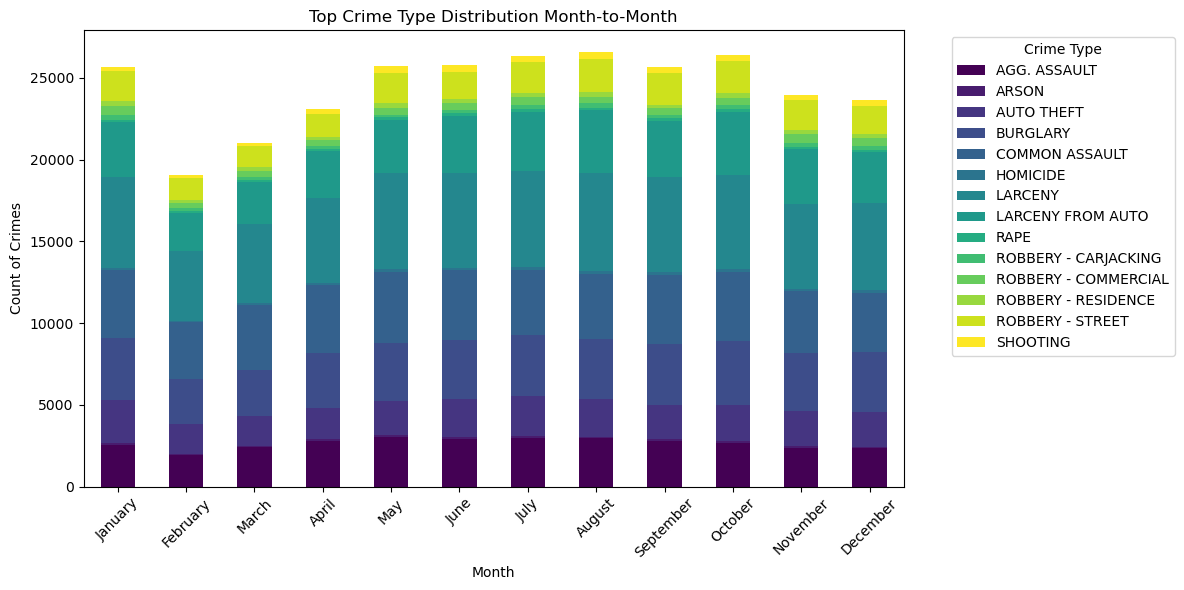

In [58]:
### Plot 2: Month-to-Month Crime Type Distribution
plt.figure(figsize=(12, 6))
crime_type_monthly = df.groupby(['month', 'Description']).size().unstack(fill_value=0)
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
crime_type_monthly = crime_type_monthly.reindex(months_order)  # Ensure months are in correct order
crime_type_monthly.plot(kind='bar', stacked=True, ax=plt.gca(),cmap='viridis')
plt.title('Top Crime Type Distribution Month-to-Month')
plt.xlabel('Month')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

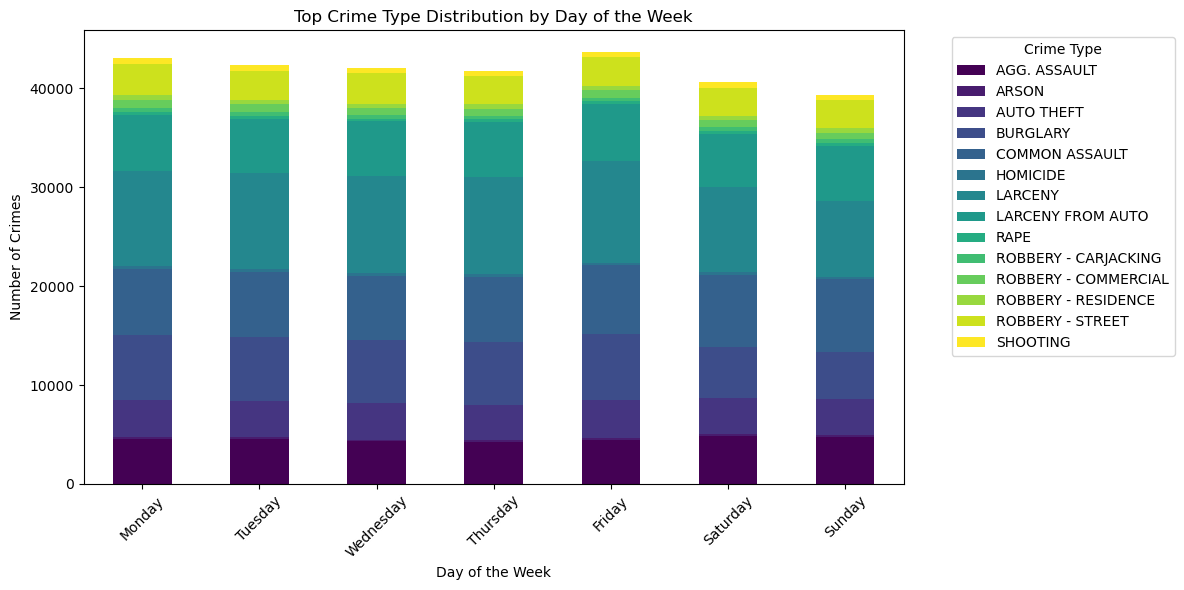

In [62]:
# Plot for Day-of-Week Crime Type Distribution
plt.figure(figsize=(12, 6))
# Ensure days of the week are in correct order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df.groupby(['day_of_week', 'Description']).size().unstack(fill_value=0)
day_counts = day_counts.reindex(order)  # Ensure correct order of days
# Create a stacked bar plot
day_counts.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
plt.title('Top Crime Type Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Question 5.Design a dashboard that allows users like Gary to explore the spatial and temporal patterns of crime

In [409]:
pip install dash plotly pandas



   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB 660.6 kB/s eta 0:00:12
    --------------------------------------- 0.1/7.5 MB 1.2 MB/s eta 0:00:07
   --- ------------------------------------ 0.6/7.5 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.5 MB 10.2 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.5 MB 12.6 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.5 MB 14.6 MB/s eta 0:00:01
   -------------------------- ------------- 5.0/7.5 MB 15.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.0/7.5 MB 16.8 MB/s eta 0:00:01
   ------------------------------------- -- 7.1/7.5 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 17.1 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 15.9 MB/s eta 0:00:00


In [70]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

# Convert 'date' to datetime format if necessary
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Create new columns for year, month, and day of week
df['year'] = df['CrimeDate'].dt.year
df['month'] = df['CrimeDate'].dt.month
df['day_of_week'] = df['CrimeDate'].dt.day_name()

# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Baltimore crime data Dashboard", style={'text-align': 'center'}),
    
    # Dropdown to select the year
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id="year-dropdown",
            options=[{'label': str(year), 'value': year} for year in sorted(df['year'].unique())],
            value=df['year'].min(),  # Default value
            clearable=False
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    # Dropdown to select the crime type
    html.Div([
        html.Label("Select Crime Type:"),
        dcc.Dropdown(
            id="crime-dropdown",
            options=[{'label': crime_type, 'value': crime_type} for crime_type in df['Description'].unique()],
            value=df['Description'].unique()[0],  # Default value
            clearable=False
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),
    
    # Graph for temporal analysis (line chart for crimes over months)
    dcc.Graph(id='temporal-graph'),
    
    # Graph for spatial analysis (scatter map for crimes by location)
    dcc.Graph(id='spatial-graph')
])

# Define the callback to update the temporal graph
@app.callback(
    Output('temporal-graph', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('crime-dropdown', 'value')]
)
def update_temporal_graph(selected_year, selected_crime):
    filtered_df = df[(df['year'] == selected_year) & (df['Description'] == selected_crime)]
    
    # Create a line chart showing the number of crimes per month
    temporal_fig = px.line(
        filtered_df.groupby('month').size().reset_index(name='crime_count'),
        x='month', y='crime_count',
        title=f'Crime Type: {selected_crime} in {selected_year} (Monthly)',
        labels={'month': 'Month', 'crime_count': 'Number of Crimes'}
    )
    return temporal_fig

# Define the callback to update the spatial graph
@app.callback(
    Output('spatial-graph', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('crime-dropdown', 'value')]
)
def update_spatial_graph(selected_year, selected_crime):
    # Filter data based on user selection
    filtered_df = df[(df['year'] == selected_year) & (df['Description'] == selected_crime)]
    
    # Create a scatter map based on the filtered data
    spatial_fig = px.scatter_mapbox(
        filtered_df,
        lat='Latitude', lon='Longitude',  # Assuming you have lat/lon columns in the dataset
        zoom=10, height=600,
        title=f'Spatial Distribution of {selected_crime} in {selected_year}',
        mapbox_style="carto-positron",  # Uses a simple, clean map style
        hover_data=['Description', 'CrimeDate']
    )
    
    return spatial_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True,port=8051)
